In [12]:
# load required packages
%matplotlib inline
import numpy as np
import random
import math
from random import sample 
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm 
import imageio
from mpl_toolkits.mplot3d import Axes3D

In [13]:
# measure runtime
#initialize before running an algorithm
import progressbar as pb
# initialize widgets
widgets = ['Time for loop of 1000 iterations: ', pb.Percentage(), ' ', 
            pb.Bar(marker=pb.RotatingMarker()), ' ', pb.ETA()]
# initialize timer
timer = pb.ProgressBar(widgets=widgets, maxval=1000000).start()


# K-Means

In [14]:
def euclidean_dist(point1, point2):
    d = np.sum(np.square(point2-point1))
    return (np.sqrt(d))

"""Takes the X matrix and the centroids. Then measures the shortest 
distances between them and returns a vector of cluster indices per sample in X"""
def closest_centroids(X, centroid):
    id_ = np.zeros((X.shape[0],1))
    
    #Loop through each sample in X
    for x in range(id_.shape[0]):
        point = X[x]
        #measure distance of this point from each centroid,
        #Keep track of shortest distance and index of shortest distance
        min_dist, idx = 255, 0
        for i in range(centroid.shape[0]):
            centroid_ = centroid[i]
            dist = euclidean_dist(centroid_,point)
            if dist < min_dist:
                min_dist = dist
                idx = i
        #modify the index vector with new id
        id_[x] = idx
        
    return id_


"""Takes X matrix and index vector to compute new centroids"""
def new_centroids(X, id_):
    new = []
    for x in range(len(np.unique(id_))):
        new.append(np.array([X[i] for i in range(X.shape[0]) if id_[i] == x]))
    return np.array([np.mean(y,axis=0) for y in new])


"""Implement k-means all at once """
def kmeans(X, initial_centroids, k,n_iter):
    current_centroids = initial_centroids
    id_ = closest_centroids(X,current_centroids)
    current_centroids = new_centroids(X,id_)
    curr_cent = np.array (current_centroids)
    prev_cent = np.array(initial_centroids)
#     print (curr_cent)
    ite = 0
    while not np.array_equal (prev_cent,curr_cent) and ite < n_iter:
        ite += 1
        print (ite)
        prev_centroids = []
        prev_centroids.append(current_centroids)
        prev_cent = np.array(prev_centroids)
        id_ = closest_centroids(X,current_centroids)
        current_centroids = new_centroids(X,id_)
        curr_cent = np.array (current_centroids)
        #update
        timer.update(ite)
    #finish
    timer.finish()

    return id_, prev_centroids

"""Initialize k random centroids"""
def k_random_centroids(X, k):
    random_indices = sample(range(0,X.shape[0]),k)
    return np.array([X[i] for i in random_indices])


"""Perform k-means and compress image according to given k"""
def CompressImage(k,n_iter):
    datafile = 'flowersm.ppm'
    A = imageio.imread(datafile)
    # Divide every entry in A by 255 so all values are in the range of 0 to 1
    A = A / 255.0
    # Unroll the image to shape (14400,3) (14400 is 120*120)
    A = A.reshape(-1, 3)
    # Run k-means on this data, forming k clusters, with random initialization
    id_, prev_centroids = kmeans(A,k_random_centroids(A,k), k,n_iter)
    id_ = closest_centroids(A, prev_centroids[-1])
    final_centroids = prev_centroids[-1]
#     print (final_centroids)
    # Loop through the original image and form a new image
    # that only has k colors in it
    compressed_image = np.zeros((id_.shape[0],3))
    for x in range(compressed_image.shape[0]):
        compressed_image[x] = final_centroids[int(id_[x])]  
#     print (compressed_image)
    return compressed_image

def plot (img,filename):
    plt.clf()
    reshaped = img.reshape(120,120,3)
    imageio.imwrite(filename, reshaped)
    plt.imshow(reshaped)
    plt.title ('Color Compressed Image')
    plt.show()
    
    
def plot_original(filename):
    A = imageio.imread(filename)
    print("A shape is ",A.shape)
    plt.imshow(A)
    plt.title ('Original Image')
    

In [5]:
# orig = plot_original ('flowersm.ppm')

In [3]:
# i1 = CompressImage(2,10)
# i2 = CompressImage(4.10)
# i3 = CompressImage(8,10)
# i4 = CompressImage(16,10)
# i5 = CompressImage(32,10)
# i6 = CompressImage(64,10)
# i7 = CompressImage(128,10)
# i8 = CompressImage(256,10)


In [4]:
# plot (i1,"k2.ppm")
# plot (i2,"k4.ppm")
# plot (i3,"k8.ppm")
# plot (i4,"k16.ppm")
# plot (i5,"k32.ppm")
# plot (i6,"k64.ppm")
# plot (i7,"k128.ppm")
# plot (i8,"k256.ppm")


# Original Image Data Distribution

3


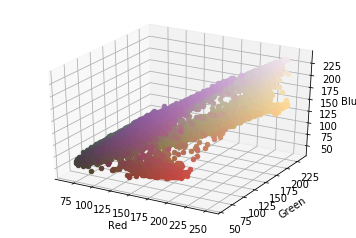

In [22]:
import imageio
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from PIL import Image
import numpy as np

fig = pyplot.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

datafile = 'flowersm.ppm'
A = imageio.imread(datafile)
A = A.reshape(-1, 3)
A = A.tolist()
print (len(A[0]))
for i in range(len(A)):
    ax.scatter3D (A[i][0],A[i][1],A[i][2],c=np.array(A[i])/255.)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
pyplot.show()


# Winner-Take-All

In [16]:
def euclidean_dist(point1, point2):
    d = np.sum(np.square(point2-point1))
    return (np.sqrt(d))

def closest_centroids(X, centroid,k):
    id_ = np.zeros((X.shape[0],1))
    id_ = np.zeros((X.shape[0],1))
    #Loop through each data point in X

    for x in range(id_.shape[0]):
        point = X[x]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        min_dist, idx = 255, 0
        for i in range(k):
            if centroid is None:
                random_indices = sample(range(0,X.shape[0]),k)
                centroid = np.array([X[i] for i in random_indices])
                centroid_ = centroid[i] 
            elif centroid[i].size==0:
                centroid[i] = np.zeros((1,3))
                centroid_ = centroid[i] 
            else:
                centroid_ = centroid[i]
            dist = euclidean_dist(centroid_,point)
            if dist < min_dist:
                min_dist = dist
                idx = i
#         print (centroid_)
        #With the best index found, modify the result idx vector
        id_[x] = idx
                
    return id_


# calculate new centroids
def new_centroids(X, id_,prev_centroids,k):
    prev_cen = prev_centroids[0].tolist()
    n = k
    new = []
    for x in range(n):
        a = [X[i] for i in range(X.shape[0]) if id_[i] == x]
        new.append(a)
    
    
    new_cen = []
    for x in range (n):
        new_ = []
        for y in new[x]:
            part1 = np.array(prev_cen[x])
            part2_ = y-part1
            part2 = 0.001*part2_
            new__ = part1 + (part2)
            new_.append(np.array(new__))
        mean =  np.array([sum(y)/len(y) for y in new_])
#         print (mean)
        new_cen.append(mean)
#     print (new_cen)
    return np.array(new_cen)

# Implement winner-take-all all at once
def winner_take_all(X, initial_centroids, k, n_iter):
    prev_centroids = []
    current_centroids = initial_centroids
    prev_centroids.append(current_centroids)
    prev_cent = np.array(prev_centroids)
    id_ = closest_centroids(X,current_centroids,k)
    current_centroids = new_centroids(X,id_,prev_centroids,k)
    curr_cent = np.array(current_centroids)
    
    ite = 0
    while not np.array_equal (prev_cent,curr_cent) and ite < n_iter:
        ite += 1
        print (ite)
        prev_centroids = []
        current_centroids = initial_centroids
        prev_centroids.append(current_centroids)
        prev_cent = np.array(prev_centroids)
        id_ = closest_centroids(X,current_centroids,k)
        current_centroids = new_centroids(X,id_,prev_centroids,k)
#         print (prev_centroids)
        curr_cent = current_centroids
        #update
        timer.update(ite)
    #finish
    timer.finish()

#     print (prev_centroids)
    return id_, prev_centroids


def k_random_centroids(X, k):
    random_indices = sample(range(0,X.shape[0]),k)
    return np.array([X[i] for i in random_indices])

    
def CompressImage(k):
    datafile = 'flowersm.ppm'
    A = imageio.imread(datafile)
    A = A / 255.0
    A = A.reshape(-1, 3)
    id_, prev_centroids = winner_take_all(A,k_random_centroids(A,k), k,n_iter=10)
    id_ = closest_centroids(A, prev_centroids[-1],k)
    final_centroids = prev_centroids[-1]
    compressed_image = np.zeros((id_.shape[0],3))
    for x in range(compressed_image.shape[0]):
        compressed_image[x] = final_centroids[int(id_[x])]
#     print (compressed_image)
    return compressed_image

def plot (img,filename):
    plt.clf()
    reshaped = img.reshape(120,120,3)
    imageio.imwrite(filename, reshaped)
    plt.imshow(reshaped)
    plt.title ('Color Compressed Image')
    plt.show()
    

In [18]:
# i256 = CompressImage(256)
# plot (i256,'k256_winner_take_all.ppm')

# Kohonen's Self Organizing Maps

In [41]:
def euclidean_dist(point1,point2):
    difference = point1-point2
    if (difference.ndim ==1):
        return np.abs(difference)
    return np.linalg.norm(difference,axis = 1)

# function for SOM
def SOM (A, variance, min_eps, max_eps, k):
    min_ = 0
    max_ = 255
    n_iter = 10
    sqrt_k = int (np.ceil(np.sqrt(k)))
    prev_centroids  = np.array([0 for j in range(len(A))])
    new_A = np.array([1 for j in range(len(A))])
    
    # create grid of centroids
    new_centroids = np.array([[np.random.uniform(min_, max_) for i in range (3)]for j in range(k)])
    indices = np.array([ind for ind in range(k)])

    new_centroids = np.array(new_centroids)
    ite = 0
    while not np.array_equal(prev_centroids,new_A) and ite < n_iter:
        prev_centroids = np.copy(new_A)
        
        ite += 1
        print (ite)
        epsilon = max_eps*(min_eps/max_eps)**(ite/n_iter)
        for i in range(0,len(A)):
            distance = euclidean_dist(new_centroids,A[i])
            n = np.column_stack((indices,distance))
            n = n[n[:,1].argsort()]
            cluster_indices = int(n[0,0])            
            n = n[n[:,1] <= variance]
            for j in range(len(n)):
                phi = np.exp(-np.linalg.norm(new_centroids[int(n[j,0])]-new_centroids[cluster_indices])**2/(2*variance**2))
                new_centroids[int(n[j,0])] = new_centroids[int(n[j,0])]+epsilon*phi*(np.subtract(A[i],new_centroids[cluster_indices]))
                
            new_A [i] = cluster_indices
        #update
        timer.update(ite)
    #finish
    timer.finish()

    new_centroids = np.array([[int(np.round(new_centroids[j,i]))for i in range(3)]for j in range(k)])
    return np.array(new_A),new_centroids
    

def CompressImage(k,filename):
    datafile = 'flowersm.ppm'
    A = imageio.imread(datafile)
    A = A.reshape(-1, 3)
    new_A,new_centroids = SOM (A, 10.0, 0.0001,0.1,k)

    new_r_val = []
    new_g_val = []
    new_b_val = []
    
    dimension = 120
    for i in range(dimension):
        new_r_ = []
        new_g_ = []
        new_b_ = []
        for j in range(dimension):
            new_r_.append(new_centroids[new_A[i*dimension+j],0])
            new_g_.append(new_centroids[new_A[i*dimension+j],1])
            new_b_.append(new_centroids[new_A[i*dimension+j],2])
        new_r_val.append(new_r_)
        new_g_val.append(new_g_)
        new_b_val.append(new_b_)
        
    new_img = np.stack(np.array([new_r_val,new_g_val,new_b_val]),axis = 2)
    plt.imshow(new_img)
    imageio.imwrite(filename, new_img)
    plt.title ('Color Compressed Image')
    
# CompressImage ('k#_SOM.ppm',k)


# Mean-Shift

In [24]:
def euclidean_dist(point1, point2):
    d = np.sum(np.square(point2-point1))
    return np.sqrt(d)

def neighborhoods(X, centroid, X_distance):
    neighbors = []
    for x in X:
        distance = euclidean_dist(x, centroid)
        if distance <= X_distance:
            neighbors.append(x)
    return neighbors

def gaussian_window(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val


data_distance = 10
window_size = 2


In [27]:
A = imageio.imread('flowersm.ppm')
A = A.reshape(-1, 3)
data = np.copy(A)

new_data_list = []
n_iter = 10
for ite in range(n_iter):
    print('Iteration: ', ite)    
#     count = 0
    for k, x in enumerate(data):
#         count += 1
#         print (count)
        
        # find the neighbors for each x.
        neighbors = neighborhoods(data, x, data_distance)
        
        # calculate the mean shift m(x) for each x.
        num = 0
        denom = 0
        for n in neighbors:
            dist = euclidean_dist(n, x)
            window_func = gaussian_window(dist, window_size)
            num += (window_func * n)
            denom += window_func
        
        mean_x = num / denom
        
        # update x ← m(x).
        data[k] = mean_x
        
        #update
        timer.update(ite)
    #finish
    timer.finish()

    new_data_list.append(np.copy(data))


In [ ]:
# print (new_data_list)
# plot (new_data_list[0],'ms.ppm')

# MSE & Error Visualization

In [29]:
def mse(imageA, imageB):
    # sum of the squared difference between the two images with same dimensions
    im1 = imageio.imread(imageA)/ 255.0
    im2 = imageio.imread(imageB)/255.0
    error = np.sum((im1.astype("float") - im2.astype("float")) ** 2)
    error /= float(im1.shape[0] * im1.shape[1])

    # to visualize the difference between two images
    dif = im1.astype("float") - im2.astype("float")
    imgplot = plt.imshow(dif)
    # Choose a color palette
    imgplot.set_cmap('Spectral')
    plt.axis('off')
    plt.show()
    
    return error

# mse_org = mse("flowersm.ppm", "flowersm.ppm")
# mse_2 = mse("k2.ppm", "flowersm.ppm")
# mse_4 = mse("k4.ppm", "flowersm.ppm")
# mse_8 = mse("k8.ppm", "flowersm.ppm")
# mse_16 = mse("k16.ppm", "flowersm.ppm")
# mse_32 = mse("k32.ppm", "flowersm.ppm")
# mse_64 = mse("k64.ppm", "flowersm.ppm")
# mse_128 = mse("k128.ppm", "flowersm.ppm")
# mse_256 = mse("k256.ppm", "flowersm.ppm")
# mse_wta = mse("k256_winner_take_all.ppm", "flowersm.ppm")
# mse_som = mse("k256_SOM.ppm", "flowersm.ppm")
# mse_ms = mse ("ms_.ppm","flowersm.ppm")


In [45]:
# visualize difference between two images
from PIL import Image, ImageChops, ImageDraw
point_table = ([0] + ([255] * 255))

def gray(size, color):
    img = Image.new('L',size)
    draw = ImageDraw.Draw(img)
    draw.rectangle((0,0) + size, color)
    return img

def black(a, b, opacity=0.85):
    difference = ImageChops.difference(a, b)
    difference = difference.convert('L')
    threshold_difference = difference
    for repeat in range(3):
        threshold_difference  = ImageChops.add(threshold_difference, threshold_difference)
    h,w = size = difference.size
    mask = gray(size, int(255 * (opacity)))
    shade = gray(size, 0)
    new = a.copy()
    new.paste(shade, mask=mask)
    new.paste(b, mask=threshold_difference)
    return new

# a = Image.open('flowersm.ppm')
# b = Image.open('k256.ppm')
# c = black(a, b)
# c.save('diff_k256.png')


In [ ]:
# mse graph for k-means with different k
def plot_mse_k(k,mse):
    # plot mean squared error with respect to different number of clusters  
    plt.figure(figsize=(10,8))
    line1 = plt.plot(k, mse,'bo-')
    plt.xlabel('Cluster Numbers')
    plt.ylabel('Mean Squared Error')
    plt.title('Performance Gain/Loss for Different Number of Clusters')

k = []
for n in range (1,9):
    k.append (2**n)
# print (k)

mse = [mse_2,mse_4,mse_8,mse_16,mse_32,mse_64,mse_128,mse_256]

# plot_mse_k (k,mse)